In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

advanced_features = pd.read_csv('basketball_csvs/advanced_features.csv')
winners = pd.read_csv('basketball_csvs/Champions.csv')

In this notebook we will take a rudimentary analysis at the effectiveness of using advanced basketball statistics to predict the champion of each season. To summarize it is much more useful than guessing at random but it does not offer a good enough confidence in the winner.

The technique used was to see the percentage of team stats that were below or equal to the Champion stat. By taking the average and variance of this number over all years we have a metric that shows the relationship between a good statistic and a Champion.

In [2]:
advanced_features.head()

,Year,Team,Assist_Ratio,Pythagorean_Winning_Percentage,Efficiency_Differential,Defensive_Rebounding_Percentage,Possessions_game,Possessions_opp_game,Offensive_Rebounding_Percentage,Pace,...,Pace_Average,Pace_Differential,Possessions_Differential,Rank,W/L%,MOV/A,ORtg/A,DRtg/A,NRtg/A,Position
0,1986,Atlanta Hawks,17.270312,0.591152,9.24,0.665909,98.99520,99.13344,0.348624,98.449014,...,100.77809,-2.329076,-0.13824,4,0.610,2.59,108.76,106.19,2.57,4
1,1986,Boston Celtics,19.801845,0.805120,8.96,0.716418,100.75776,100.62336,0.313107,99.817160,...,100.77809,-0.960930,0.13440,1,0.817,9.06,112.54,103.67,8.87,1
2,1986,Chicago Bulls,17.070792,0.362645,7.31,0.673123,99.28320,99.24480,0.351351,98.402974,...,100.77809,-2.375116,0.03840,20,0.366,-3.12,109.95,113.06,-3.11,5
3,1986,Dallas Mavericks,17.838798,0.539461,2.20,0.667411,101.24928,101.28000,0.300000,100.635667,...,100.77809,-0.142423,-0.03072,8,0.537,0.70,112.45,111.59,0.86,4
4,1986,Denver Nuggets,17.241379,0.546840,2.52,0.641723,105.96480,105.72672,0.309129,105.450321,...,100.77809,4.672231,0.23808,9,0.573,0.89,107.16,106.43,0.73,4


In [3]:
winners.head()

,Year,Team
0,1986,Boston Celtics
1,1987,Los Angeles Lakers
2,1988,Los Angeles Lakers
3,1989,Detroit Pistons
4,1990,Detroit Pistons


In [4]:
#add a column which shows if the team is a Champion in that year
winners.index = winners['Year']
features = advanced_features.drop(['Rank', 'Position'], axis = 1)
features['winner'] = pd.Series([1 if winners['Team'].loc[features['Year'].loc[i]] == features['Team'].loc[i] else 0 for i in features.index])


In [5]:
features.head()

,Year,Team,Assist_Ratio,Pythagorean_Winning_Percentage,Efficiency_Differential,Defensive_Rebounding_Percentage,Possessions_game,Possessions_opp_game,Offensive_Rebounding_Percentage,Pace,...,Turnover_Ratio,Pace_Average,Pace_Differential,Possessions_Differential,W/L%,MOV/A,ORtg/A,DRtg/A,NRtg/A,winner
0,1986,Atlanta Hawks,17.270312,0.591152,9.24,0.665909,98.99520,99.13344,0.348624,98.449014,...,12.655573,100.77809,-2.329076,-0.13824,0.610,2.59,108.76,106.19,2.57,0
1,1986,Boston Celtics,19.801845,0.805120,8.96,0.716418,100.75776,100.62336,0.313107,99.817160,...,11.295898,100.77809,-0.960930,0.13440,0.817,9.06,112.54,103.67,8.87,1
2,1986,Chicago Bulls,17.070792,0.362645,7.31,0.673123,99.28320,99.24480,0.351351,98.402974,...,12.193423,100.77809,-2.375116,0.03840,0.366,-3.12,109.95,113.06,-3.11,0
3,1986,Dallas Mavericks,17.838798,0.539461,2.20,0.667411,101.24928,101.28000,0.300000,100.635667,...,10.897632,100.77809,-0.142423,-0.03072,0.537,0.70,112.45,111.59,0.86,0
4,1986,Denver Nuggets,17.241379,0.546840,2.52,0.641723,105.96480,105.72672,0.309129,105.450321,...,10.767605,100.77809,4.672231,0.23808,0.573,0.89,107.16,106.43,0.73,0


In [6]:
#Split the data into a dataframe for each year
teams = []
start = features.index[0]
for year in winners.index:
    team = pd.DataFrame()
    for i in features.index[start:]:
        row = features.loc[i]
        if row['Year'] == year:
            team = team.append(row)
        else:
            start = i
            break
    
    teams.append(team)


In [7]:
#For each year compute the percentage less than or equal to the winning stat

statscores = pd.DataFrame()
for k in teams:
    yr = k['Year'].iloc[0]
    #drop team because it is text
    te = k.drop(['Team'], axis = 1)
    #get the set of stats for the champion and its index
    wi = te[te['winner'] == 1].index[0]
    winning_stats = te.loc[wi]
    #Do DataFrame_without_Champion - Stats_of_Champion
    adjusted = pd.DataFrame(te.values - winning_stats.values, columns = te.columns, index = te.index)
    #Calculate counts and percentage of all stats <= 0
    d = {stat: len(adjusted[stat][adjusted[stat] <= 0])/len(adjusted) for stat in adjusted}
    year_st = pd.DataFrame(d, index = [yr])
    statscores = statscores.append(year_st)

As we can see below, some stats have more variance than others and some seem to follow the trend that the Champion's stats are the highest very closely. Now we summarize this with mean and variance.

In [8]:
statscores

,Assist_Ratio,DRtg/A,Defensive_Rebounding_Percentage,Efficiency_Differential,MOV/A,NRtg/A,ORtg/A,Offensive_Rebounding_Percentage,Pace,Pace_Average,Pace_Differential,Play_Percentage,Possessions_Differential,Possessions_game,Possessions_opp_game,Pythagorean_Winning_Percentage,Turnover_Ratio,W/L%,Year,winner
1986.0,0.937500,0.125000,1.000000,0.937500,1.000000,1.000000,0.937500,0.312500,0.312500,1.0,0.312500,0.937500,0.812500,0.312500,0.312500,1.000000,0.312500,1.000000,1.0,1.0
1987.0,0.933333,0.533333,0.400000,0.466667,1.000000,1.000000,1.000000,0.600000,0.800000,1.0,0.800000,1.000000,0.400000,0.733333,0.733333,1.000000,0.533333,1.000000,1.0,1.0
1988.0,0.866667,0.733333,0.733333,0.400000,0.866667,0.866667,0.933333,0.466667,0.600000,1.0,0.600000,0.933333,0.400000,0.600000,0.666667,0.933333,0.466667,1.000000,1.0,1.0
1989.0,0.466667,0.200000,0.866667,0.733333,0.800000,0.866667,0.600000,0.733333,0.066667,1.0,0.066667,0.666667,0.333333,0.066667,0.066667,0.800000,0.733333,1.000000,1.0,1.0
1990.0,0.312500,0.125000,0.812500,0.750000,0.812500,0.812500,0.500000,0.937500,0.125000,1.0,0.125000,0.687500,0.375000,0.062500,0.062500,0.875000,0.437500,0.937500,1.0,1.0
1991.0,0.933333,0.466667,0.600000,0.866667,1.000000,1.000000,1.000000,0.933333,0.400000,1.0,0.400000,1.000000,0.400000,0.266667,0.266667,1.000000,0.066667,0.933333,1.0,1.0
1992.0,0.866667,0.333333,0.800000,0.933333,1.000000,1.000000,1.000000,0.866667,0.266667,1.0,0.266667,1.000000,0.533333,0.266667,0.266667,1.000000,0.133333,1.000000,1.0,1.0
1993.0,0.733333,0.400000,0.466667,0.800000,0.866667,1.000000,0.933333,1.000000,0.066667,1.0,0.066667,1.000000,0.933333,0.066667,0.066667,0.933333,0.066667,0.866667,1.0,1.0
1994.0,0.800000,0.133333,0.733333,0.666667,0.733333,0.733333,0.200000,0.066667,0.600000,1.0,0.600000,0.133333,0.200000,0.600000,0.666667,0.733333,0.733333,1.000000,1.0,1.0
1995.0,0.666667,0.666667,0.133333,0.600000,0.400000,0.400000,0.666667,0.133333,0.666667,1.0,0.666667,0.333333,0.066667,0.600000,0.733333,0.400000,0.800000,0.466667,1.0,1.0


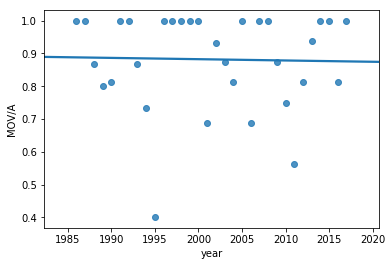

In [9]:
ax = sns.regplot(x = 'year', y= 'MOV/A', data = pd.DataFrame({'MOV/A': statscores['MOV/A'], 'year': statscores.index}), ci=0)
plt.show()

In [10]:
summary_stats = pd.DataFrame({'mean': statscores.mean(), 'variance': statscores.var()})
summary_stats.sort_values(by='mean', ascending=0)

,mean,variance
winner,1.000000,0.000000
Pace_Average,1.000000,0.000000
Year,1.000000,0.000000
W/L%,0.926042,0.013858
Pythagorean_Winning_Percentage,0.890104,0.024078
NRtg/A,0.888281,0.022475
MOV/A,0.882031,0.022283
Play_Percentage,0.792057,0.057712
ORtg/A,0.747786,0.048241
Assist_Ratio,0.697396,0.052548


Some of these are trivial. The pace average is the same for all as well as the year (for a given year) and the champion. These are the only ones that are all 1.0 so we get rid of them. Except, champion which we will use this to evaluate our guesses.

So based on this info let's take 85% as a cutoff and take all stats that are more than 85% fit. From these let's take we'll calculate the max stat for each stat for each year and see if they can "vote" on the Champion and how accurate this is.

In [11]:
summary_stats = summary_stats.drop(['Pace_Average', 'Year'])

In [12]:
#get the max stat for each stat for each year and its index, if the indexes match than we "vote" with that
results = pd.DataFrame()
stat_list = [i for i in summary_stats['mean'][summary_stats['mean'] > 0.85].index]
for k in range(len(teams)):
    test_team = teams[k][stat_list]
    
    df = pd.DataFrame({i: [max(test_team[i]),test_team[i][test_team[i] == max(test_team[i])].index[0]] for i in stat_list}, index = [str(k)+'_max', str(k)+'_index'])
    results = results.append(df)
        

In [13]:
results

,MOV/A,NRtg/A,Pythagorean_Winning_Percentage,W/L%,winner
0_max,9.06,8.87,0.805120,0.817,1.0
0_index,1.00,1.00,1.000000,1.000,1.0
1_max,8.32,7.86,0.795260,0.793,1.0
1_index,25.00,25.00,25.000000,25.000,25.0
2_max,6.15,6.23,0.706824,0.756,1.0
2_index,32.00,32.00,32.000000,39.000,39.0
3_max,7.95,7.95,0.767600,0.768,1.0
3_index,49.00,49.00,49.000000,51.000,51.0
4_max,7.09,7.03,0.741244,0.768,1.0
4_index,73.00,69.00,73.000000,69.000,66.0


In [14]:
results2 = pd.DataFrame()
for i in results.index:
    for st in stat_list:
        if results[st].loc[i] == results['winner'].loc[i]:
            results2 = results2.append(results.loc[i])
            break
    

In [15]:
results2

,MOV/A,NRtg/A,Pythagorean_Winning_Percentage,W/L%,winner
0_max,9.06,8.87,0.805120,0.817,1.0
0_index,1.00,1.00,1.000000,1.000,1.0
1_max,8.32,7.86,0.795260,0.793,1.0
1_index,25.00,25.00,25.000000,25.000,25.0
2_max,6.15,6.23,0.706824,0.756,1.0
2_index,32.00,32.00,32.000000,39.000,39.0
3_max,7.95,7.95,0.767600,0.768,1.0
3_index,49.00,49.00,49.000000,51.000,51.0
4_max,7.09,7.03,0.741244,0.768,1.0
4_index,73.00,69.00,73.000000,69.000,66.0


here we have pulled a list where any of the 4 stats are the actual Champion's stat.

In the beginning it seems very good, in years 1-14 there are only 2 not included and 3 stats which go against the majority. Then there are no Champions for 4 years and again for years 23-26, 27 is minority hit and 20 and 30 are not included. Below we calculate our success rate (including minority years) which is about 62.5% (excluding minority years it drops to 50% exactly. While these numbers don't seem too great, consider that the probability of a random guess of the Champion is 1/16 = 0.0625. Therefore, 62.5% and 50% are 10 times and 8 times better probability than random chance which is decent.

Some ways to improve would be to fine tune this method and apply it to even more stats like opponent stats. The more "voters" we have the better they are.

In conclusion, by finding the max of MOV/A, NRtg/A, Pythagorean_Winning_Percentage and W/L% and using it to vote we can have a 50% chance of correctly guessing the Champion

In [16]:
results.to_csv("stats_and_wins.csv")

In [17]:
len(results2)/len(teams)

2.0